In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo que ya cargaste la imagen RGB
image_bgr = cv2.imread('../data/imgs/marbling.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)


In [ ]:

# Paso 1: Convertir a escala de grises para remover fondo
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Paso 2: Binarizar fondo (umbral adaptativo)
_, mask_foreground = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)


In [2]:

# Paso 3: Limpiar máscara con morfología
kernel = np.ones((5, 5), np.uint8)
mask_foreground = cv2.morphologyEx(mask_foreground, cv2.MORPH_OPEN, kernel)
mask_foreground = cv2.morphologyEx(mask_foreground, cv2.MORPH_DILATE, kernel)

# Paso 4: Aplicar la máscara a la imagen original
image_nobg = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_foreground)


In [3]:

# Paso 5: Mejorar contraste (CLAHE)
lab = cv2.cvtColor(image_nobg, cv2.COLOR_RGB2LAB)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
lab[:, :, 0] = clahe.apply(lab[:, :, 0])
image_clahe_rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

# Paso 6: Convertir a HSV
hsv = cv2.cvtColor(image_clahe_rgb, cv2.COLOR_RGB2HSV)
hue = hsv[:, :, 0]
saturation = hsv[:, :, 1]
value = hsv[:, :, 2]


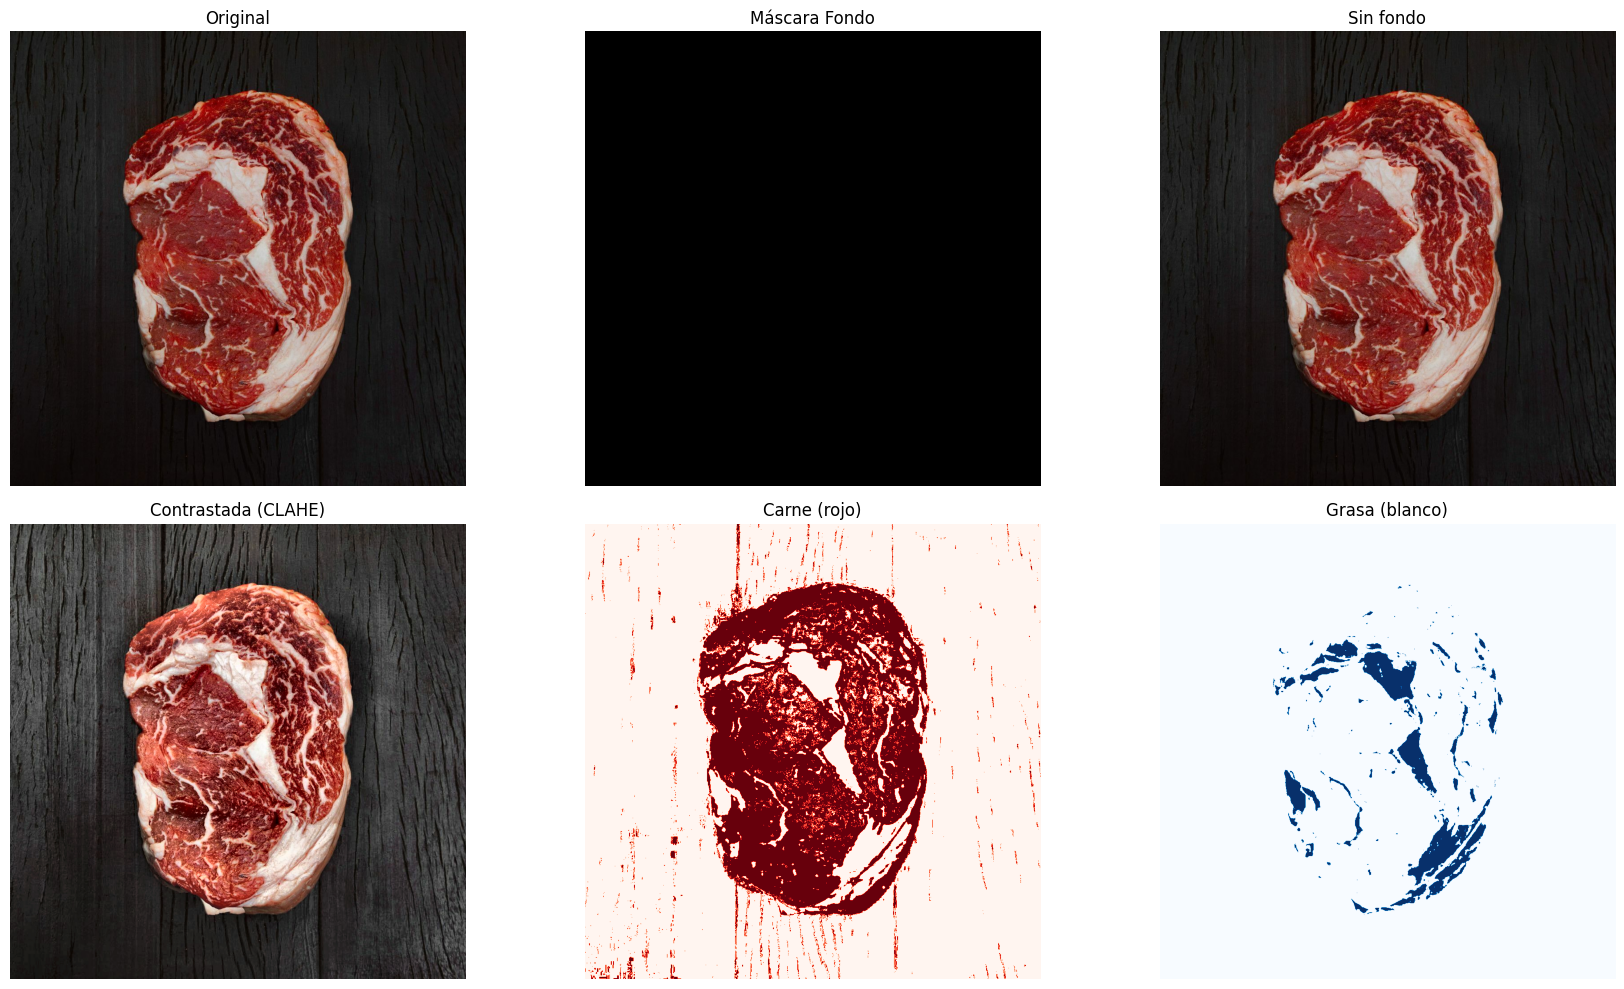

In [4]:

# Paso 7: Generar máscaras por color
mask_carne = (hue < 15) & (saturation > 60)
mask_grasa = (saturation < 50) & (value > 160)

# Visualización final
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs[0, 0].imshow(image_rgb)
axs[0, 0].set_title("Original")
axs[0, 1].imshow(mask_foreground, cmap='gray')
axs[0, 1].set_title("Máscara Fondo")
axs[0, 2].imshow(image_nobg)
axs[0, 2].set_title("Sin fondo")
axs[1, 0].imshow(image_clahe_rgb)
axs[1, 0].set_title("Contrastada (CLAHE)")
axs[1, 1].imshow(mask_carne, cmap='Reds')
axs[1, 1].set_title("Carne (rojo)")
axs[1, 2].imshow(mask_grasa, cmap='Blues')
axs[1, 2].set_title("Grasa (blanco)")
for ax in axs.flat:
    ax.axis('off')
plt.tight_layout()
plt.show()
